# Predicting Heart Disease Using Machine Learning END TO END

classification a patient has heart disease or not based on medical attributes
we are going to follow that approach:
1) Problem Definition 
2) Data
3) Evaluation 
4) Features 
5) Modelling
6) Experimentation 

## 1. Problem Definition 

wehther have a heart disease or nor thats a binary classification problem

## 2.Data

the data is from UCI heart disease dataset,it is also contain a lot of data set u can work with 
or kaggle another site contain a lot of dataset and a dictionary that explain the features in my dataset

## 3.Evaluation

if we can reach 95% accuracy at predicting whether or not have a heart disease during the proof of concept
we will pursue the project

## 4.Features

import or create the data dictionary from the dataset site to see the definition for each feature
what features should we model remove or subset or extract new features





## Note: High Correlation features can lead to Bad Model Performance 
correlation mean a 2 features that depend on each other exemple:Directly proportionel

In [3]:
#Preparing the tools

## Data Ananlysis and Plotting tools
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns

## Models From sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Models evaluation 
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_curve

In [4]:
df=pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

## Load Data

some questions to ask :
1) what problem do u wanna solve 
2) what kind of data do we have ,, how to treat different types ?
3) what is missing from the data .. and how to deal with it ? 
4) what are the outliers and why u should care about them ? 
5) how can u add or remove or change some features to get more of your data ?

## ***Balance Classes***

In [5]:
df["target"].value_counts()## its seem like balanced label which is good.. the training is better when balanced

target
1    165
0    138
Name: count, dtype: int64

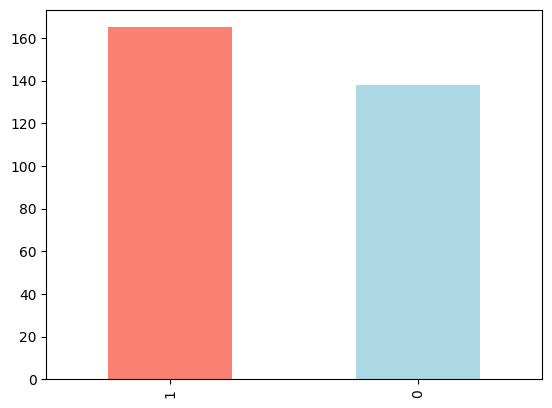

In [4]:
## show the balance
df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"]) ;

In [6]:
df.info(); ## all my data is numerical thats great no need to encode

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.isna().sum() ##the missing in each column to show 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Exploring Correlation : Heart Disease frequency according to sex

In [14]:
df["sex"].value_counts() ## there is more male in our samples

sex
1    207
0     96
Name: count, dtype: int64

In [9]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


### ***Women => 75% , Men=> 45% , 55% for human***

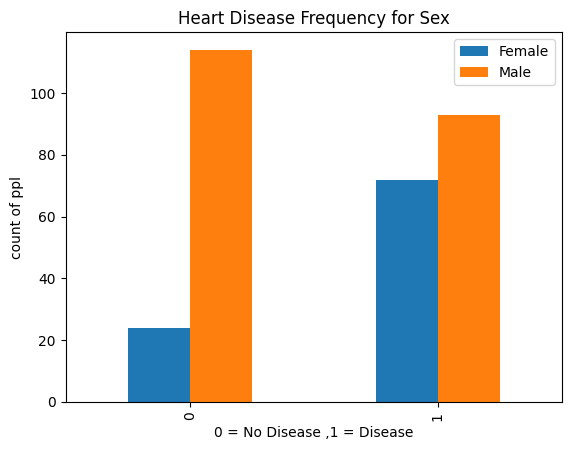

In [15]:
## i want to compare the sex column to the target column 
pd.crosstab(df.target,df.sex).plot(kind="bar")
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease ,1 = Disease")
plt.ylabel("count of ppl")
plt.legend(["Female","Male"]);


 * from the graph more men has heart-disease than woman .. taking in consideration that number of men is 
   double the number of women
   
 * But for the percentage : 1) if the sample is woman 75% that will has a heart-disease
                            2) if the sample is man 45% that will has a heart disease
                            3) 60% that a person have a heart disease (our baseline taking the average)
                            
                     


In [17]:
df["thalach"].value_counts().head() ## unlike sex 2 column there is 91 coulumn so its not a good idea to represent on a bar chart
## thalac is the max heart rate acheived from data dictionary
## we want to compare it to my target variable like sex

thalach
162    11
160     9
163     9
152     8
173     8
Name: count, dtype: int64

In [18]:
df["age"].value_counts().head(19)

age
58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
Name: count, dtype: int64

## Age vs Max Heart Rate for Heart Disease

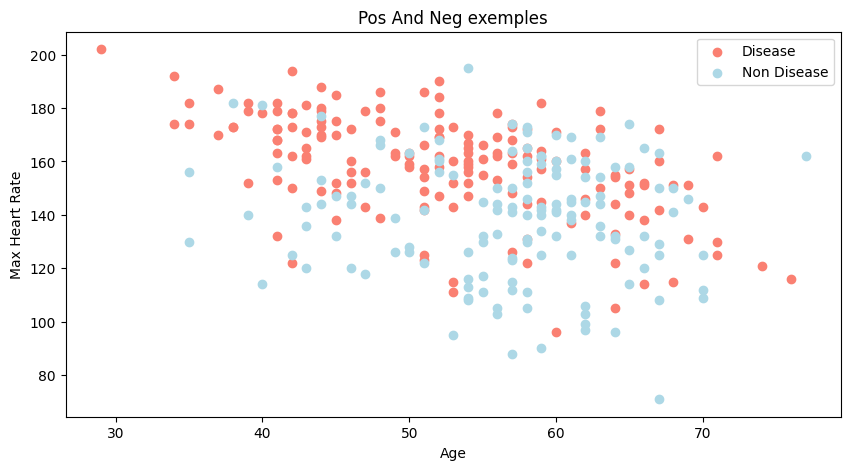

In [19]:
## scatter with positives exemples 
plt.figure(figsize=(10,5))
plt.scatter(df.age[df.target==1] ,
df.thalach[df.target==1] ,
c="salmon"
)
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.title("Pos And Neg exemples")

## scatter for negative
plt.scatter(df.age[df.target==0] ,
df.thalach[df.target==0] ,
c="lightblue"
);
plt.legend(["Disease","Non Disease"]) ;
## from a person perspective see this scatter he can define 2 area the salmon is more than the light blue and 
## the light blue is much there than the salmon thats called finding pattern and its done by our machine learning algorithm



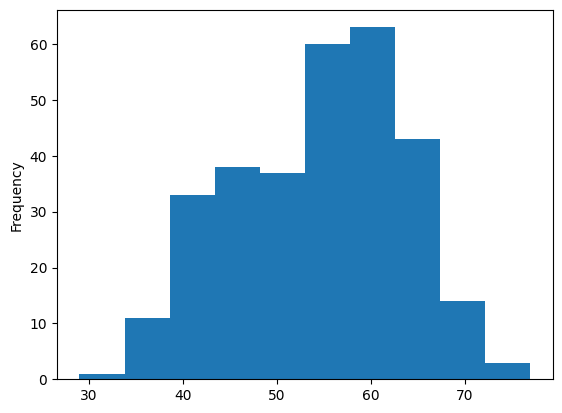

In [20]:
## show the distribution of age attribute
df.age.plot.hist();
## notice its normally distributed (belle curve)
## if u have some outliers in age like a 150 age (no one live that much !) or samples in 20 (too young to be affected by heart disease)
## u must clean up these outliers

## Histogram is one of the best to deal with this outlier problem 

### Heart Disease Frequency per chest pain Type (cp from 0 to 3 .. 0 related to heart)


In [21]:
pd.crosstab(df.cp,df.target)
## 2 is really dangerous... 3*times people who got cp=2 has heart disease 
## which is not logical since 2 is a pain that has no heart related
## so thats a matter of question and u can discuss with an expert
## all we can do is doing some relations graph between target and features so we can create some questions to ask on experts ...


target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


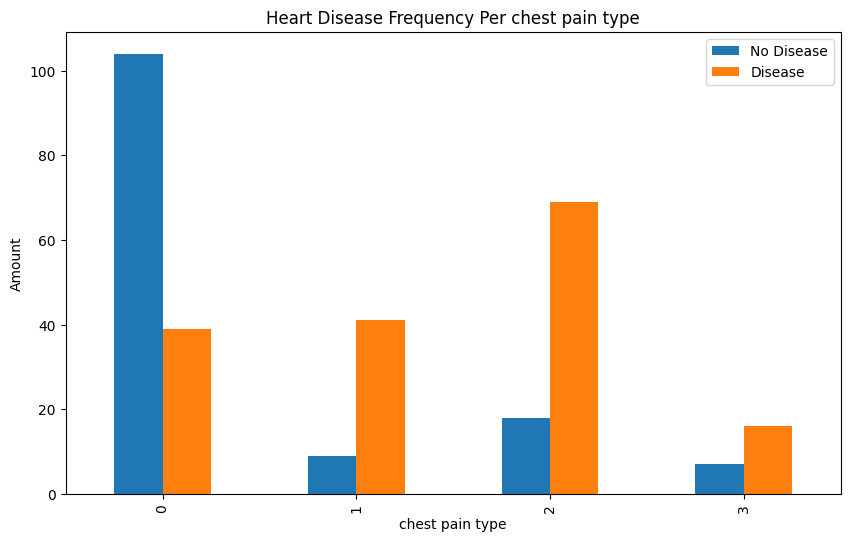

In [22]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,6))
plt.title("Heart Disease Frequency Per chest pain type")
plt.xlabel("chest pain type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"]) ;

## 4 columns can be represented in bar chart... cp=1 and cp=2 seem suspecious (and they are not heart related)


In [23]:
## correlation matrix:How these columns interact with each other a positive correlation or a negative correlation...|

(14.5, -0.5)

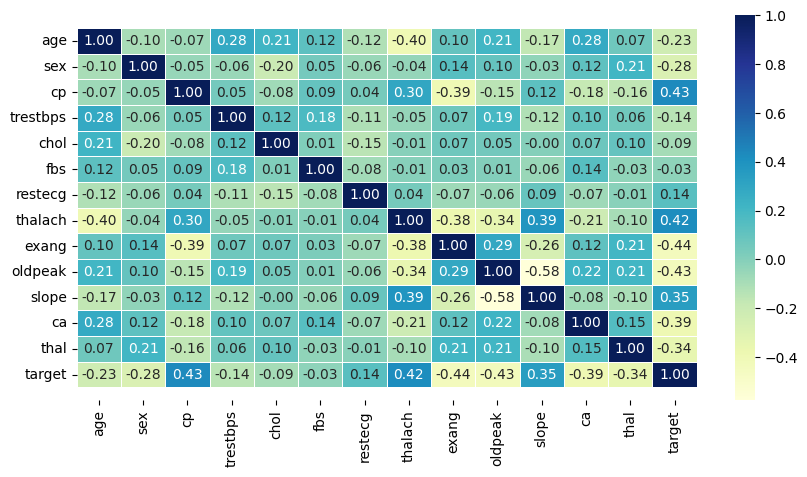

In [24]:
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(10,5))
ax=sns.heatmap(corr_matrix,
               annot=True , 
               linewidths=0.5,
               fmt=".2f" ,
               cmap="YlGnBu"
              )
bottom , top =ax.get_ylim()
ax.set_ylim(bottom + 0.5 , top - 0.5)

In [19]:
## i noticed: there is a .43 relation between cp and target ... when cp goes up ... the target value become 1 goes up
## A positive correlation between chest pain and the target. 

In [20]:
## there is other negative correlation between exang and the target value
## exercice during angina (heart pain when exercicing... )
## so if someone got heart pain when exercising thats mean a low potential of getting heart disease

## 5.Modelling

In [25]:
x=df.drop("target",axis=1)
y=df["target"]


In [26]:
np.random.seed(42)
x_train , x_test , y_train ,y_test=train_test_split(x,y,test_size=0.2)

In [27]:
x_train.head() ## it was shuffled .... good

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [28]:
## what machine learning algorithm should we use ? 
## we tried before linear svc .. we will now try kneighbours and ensemble (our best friend)

we are gonna try 3 models 
1) Logistic regression (not included in scikit learn map!!)
2) K-nearest Neighbour classifier
3) Random Forrest Classifier

In [29]:
## Put the model  want to use in a dictionary 
models={ "LogisticRegression" : LogisticRegression() ,
        "KNN":KNeighborsClassifier() ,
        "Random Forest":RandomForestClassifier()
}

def fit_score(models,x_train,x_test,y_train,y_test) :
    np.random.seed(42)
    models_score={}
    for name,model in models.items():
        model.fit(x_train,y_train)
        models_score[name]=model.score(x_test,y_test)
        
    return models_score    

In [30]:
models


{'LogisticRegression': LogisticRegression(),
 'KNN': KNeighborsClassifier(),
 'Random Forest': RandomForestClassifier()}

In [32]:
scores=fit_score(models=models,x_train=x_train,y_train=y_train,x_test=x_test,y_test=y_test)
scores

/home/rafik/Downloads/Telegram Desktop/MiniConda/project_heart_disease/my_environment/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LogisticRegression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Model Compare 

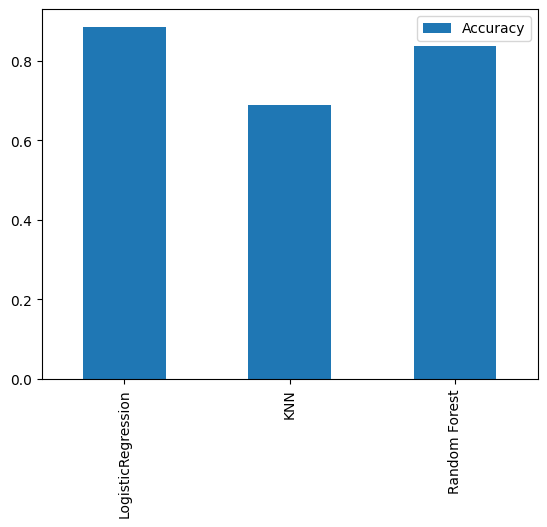

In [33]:
model_compare=pd.DataFrame(scores,index=["Accuracy"])
model_compare.T.plot.bar();

Now we got our baseline model .... we want to improve what should we do ....
1) Hyperparameter tuning 
2) Feature importance
3) Confusion Matrix 
4) cross validation 
5) recall .. precesion .. f1 
6) classification report 
7) Area under the curve ROC

## HyperParameter Tuning 

In [34]:

train_scores=[]
test_scores=[]
knn=KNeighborsClassifier()
## tuning the parameter neghbour from the knn model
neighbors = range(1,21) ## from 1 to 20

for i in  neighbors :
 knn.set_params(n_neighbors=i)
 knn.fit(x_train,y_train)
 train_scores.append(knn.score(x_train,y_train))
 test_scores.append(knn.score(x_test,y_test))

train_scores, test_scores


([1.0,
  0.8099173553719008,
  0.7727272727272727,
  0.743801652892562,
  0.7603305785123967,
  0.7520661157024794,
  0.743801652892562,
  0.7231404958677686,
  0.71900826446281,
  0.6942148760330579,
  0.7272727272727273,
  0.6983471074380165,
  0.6900826446280992,
  0.6942148760330579,
  0.6859504132231405,
  0.6735537190082644,
  0.6859504132231405,
  0.6652892561983471,
  0.6818181818181818,
  0.6694214876033058],
 [0.6229508196721312,
  0.639344262295082,
  0.6557377049180327,
  0.6721311475409836,
  0.6885245901639344,
  0.7213114754098361,
  0.7049180327868853,
  0.6885245901639344,
  0.6885245901639344,
  0.7049180327868853,
  0.7540983606557377,
  0.7377049180327869,
  0.7377049180327869,
  0.7377049180327869,
  0.6885245901639344,
  0.7213114754098361,
  0.6885245901639344,
  0.6885245901639344,
  0.7049180327868853,
  0.6557377049180327])

The max score of test score : 75.41%


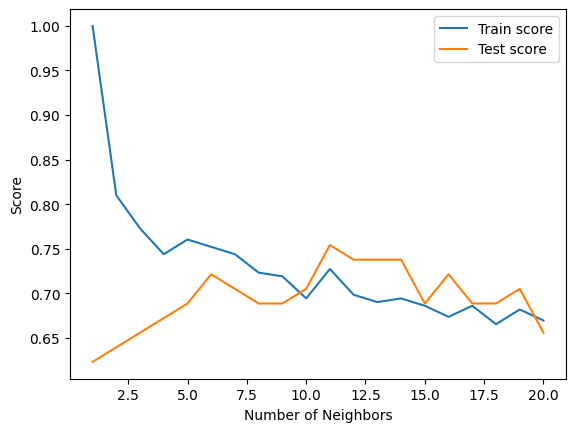

In [35]:
plt.plot(neighbors,train_scores,label="Train score")
plt.plot(neighbors,test_scores,label="Test score")
plt.xlabel("Number of Neighbors")
plt.ylabel("Score");
plt.legend()
print(f"The max score of test score : {max(test_scores)*100:.2f}%") ; ## around 11 neighbours .. (the default used is 5)
## its better than the o.66 appeared with tuning the neighbors

In [36]:
## to be sure
knn_new=KNeighborsClassifier(n_neighbors=11)
knn_new.fit(x_train,y_train)
knn_new.score(x_test,y_test)
## better than the default

0.7540983606557377

## We want to tune by RandomizedCv to try different combination of hyperparameters not only one by hand

we are going to tune:
* Logistic Regression
* Random Forrest

In [38]:
## tune a A Random Forest
## ceating a dictionary for parameter


In [39]:
## hyperparameter grid for logistic regression 
log_reg_grid={"C":np.logspace(-4,4,20),  ## c has default 1 in logistic regression
              "solver":  ["liblinear"]                ## lbfg is the default
             }
## hyperparameter grid for random forrest
random_grid={ "n_estimators": np.arange(10,1000,50), ## a range of values recommended than list
"max_depth":[None,3,5,8] ,
"min_samples_split":np.arange(2,20,2) ,
 "min_samples_leaf":np.arange(1,20,2)     
}

In [40]:
## use randomized search on logistic
rs_log_model=RandomizedSearchCV(LogisticRegression(),
                             param_distributions=log_reg_grid,
                            cv=5 , 
                            n_iter=20,
                            verbose=True
                           
                           )
rs_log_model.fit(x_train,y_train) ## 100 model


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [41]:
rs_log_model.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [42]:
rs_log_model.score(x_test,y_test) ## equal to our past result ....

0.8852459016393442

In [43]:
## use randomized search on random
np.random.seed(42)
rs_random_model=RandomizedSearchCV(RandomForestClassifier(),
                             param_distributions=random_grid,
                            cv=5 , 
                            n_iter=20, ## try 20 of them 
                            verbose=True
                           
                           )
rs_random_model.fit(x_train,y_train) ## 100 model


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 8],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [44]:
rs_random_model.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [45]:
rs_random_model.score(x_test,y_test) ## wow ..better than our baseline but still logistic is better

0.8688524590163934

In [46]:
rn=RandomForestClassifier(n_estimators=210 ,min_samples_split=4,min_samples_leaf=19,max_depth=3)
rn.fit(x_train,y_train)
rn.score(x_test,y_test)

0.8688524590163934

## **Grid Search**

In [47]:
## we are going with our logistic model...
np.random.seed(42)
gs_log_model=GridSearchCV(LogisticRegression(),
                             param_grid=log_reg_grid,
                            cv=5 , 
                            verbose=True
                           
                           )
gs_log_model.fit(x_train,y_train) 


Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [48]:
gs_log_model.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [49]:
gs_log_model.score(x_test,y_test) ## same

0.8852459016393442

a lesson to take ... there is other models not included in scikit learn map and can do 
a better peformance like logistic regression model .. u should search !

## Evaluating using classifications metrics

In [50]:
## we will go with our gread search logistic regression model 
y_pred = gs_log_model.predict(x_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [51]:
len(y_pred)

61

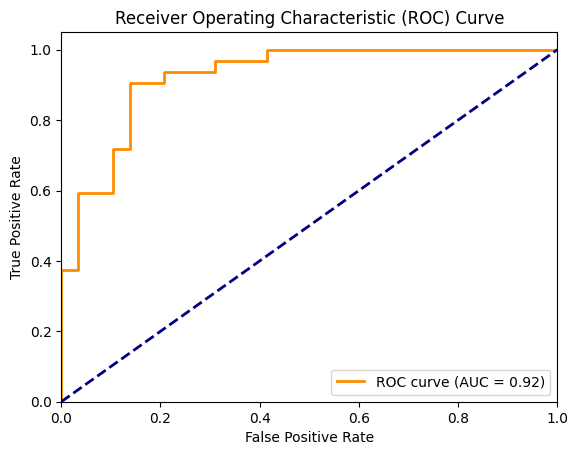

In [52]:
## Roc curve ... how well your model is doing by comparing the true positive and the false positive
## how many classified as a true heart_disease patient and how manu classified wrongly as heart disease
y_probs = gs_log_model.predict_proba(x_test)
y_probs_positive=y_probs[:,1] 
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## 0.92 accuracy how is that? 

## false ones are 3 and true ones are 29 ...  thats what roc curve tells u 

In [53]:
print(confusion_matrix(y_test,y_pred))

[[25  4]
 [ 3 29]]


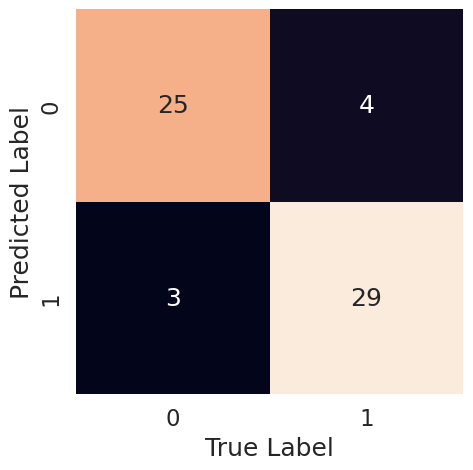

In [54]:
sns.set(font_scale=1.5)
conf_mat=confusion_matrix(y_test,y_pred)
def plot_conf_mat(conf_mat) :
 fig,ax=plt.subplots(figsize=(5,5))
 ax=sns.heatmap(conf_mat,annot=True,cbar=False)
 plt.xlabel("True Label")
 plt.ylabel("Predicted Label")
    
plot_conf_mat(conf_mat)

In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [57]:
## what is percision and what is recall 
## in accuracy or .score method i look on how many i got correct from the model answer y_test
## in precision and recall i look on how many i get wrong in each class 
## if u have less wrong prediction in class 1 thats a high precison .... 
##  if u have less wrong prediction in class 2 thats a high recall .... 
## if u have a high precision and poor recall ...(doing good on only one class) or vice-verse thats when f1 involve



## 1) * first for the 0 .... the 0 is predicted truth 25 time and there is 3 times that is predicted 1 by false
## so the precision of 0 is 25/25+3 = 0.89 , i failed to identify the 0 in 3 times

## 2) * for recall the 0 is predicted truth 25 times and 4 times is predicted 0 by false
## so the recall of 0 is 25/25+4=0.86 , i identified 4 zero by wrong that they are actually 1

## 3) Accuracy overall there are 7 fault in a 61.. accuracy is 0.89

### calculate metrics using cross validation

In [58]:
gs_log_model.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [59]:
## create a new model with the best params
cv_log_reg=LogisticRegression(C= 0.23357214690901212, solver='liblinear')


In [61]:
cv_acc=cross_val_score(cv_log_reg,x,y,scoring="accuracy")
cv_acc
## our current acccuracy is in the middle.....

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [62]:
np.mean(cv_acc)

0.8479781420765027

In [63]:
cv_pre=cross_val_score(cv_log_reg,x,y,scoring="precision")
cv_pre  ## our is 0.885 thats appeared in the classification report (average of precision of 0 and precision of 1)

array([0.775     , 0.88571429, 0.86111111, 0.86111111, 0.725     ])

In [64]:
np.mean(cv_pre)

0.8215873015873015

In [65]:
cv_rec=cross_val_score(cv_log_reg,x,y,scoring="recall")
cv_rec

array([0.93939394, 0.93939394, 0.93939394, 0.93939394, 0.87878788])

In [66]:
np.mean(cv_rec)

0.9272727272727274

In [67]:
cv_f1=cross_val_score(cv_log_reg,x,y,scoring="f1")
cv_f1

array([0.84931507, 0.91176471, 0.89855072, 0.89855072, 0.79452055])

In [68]:
np.mean(cv_f1)

0.8705403543192143

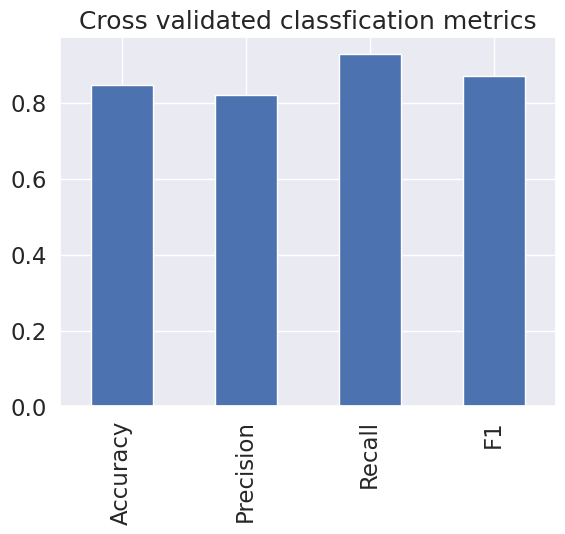

In [69]:
## putting all together
cv_metric=pd.DataFrame({"Accuracy":cv_acc.mean(),"Precision":cv_pre.mean(),"Recall":cv_rec.mean(),"F1":cv_f1.mean()},index=[0])
cv_metric.T.plot.bar(title="Cross validated classfication metrics",legend=False) ;

### features importance

we will do experiments... what features contributed most to the outcomes of the model .and how did they contributed..

In [70]:
## how to find features importance using logistic regression ()

In [71]:
cv_log_reg.fit(x_train,y_train) ;

In [65]:
cv_log_reg.coef_ ## how each feature contributed

array([[ 0.00369922, -0.90424093,  0.67472825, -0.0116134 , -0.00170364,
         0.04787688,  0.33490201,  0.02472938, -0.63120409, -0.57590965,
         0.47095149, -0.65165346, -0.69984211]])

In [73]:
feature_dict=dict(zip(df.columns,list(cv_log_reg.coef_[0])))
feature_dict

{'age': 0.003699221637468348,
 'sex': -0.9042409285681821,
 'cp': 0.6747282509580259,
 'trestbps': -0.01161340020470111,
 'chol': -0.001703643832580693,
 'fbs': 0.04787687733697116,
 'restecg': 0.3349020071657312,
 'thalach': 0.024729382421010974,
 'exang': -0.631204086699102,
 'oldpeak': -0.5759096490529799,
 'slope': 0.47095148586447144,
 'ca': -0.6516534633329255,
 'thal': -0.6998421076287815}

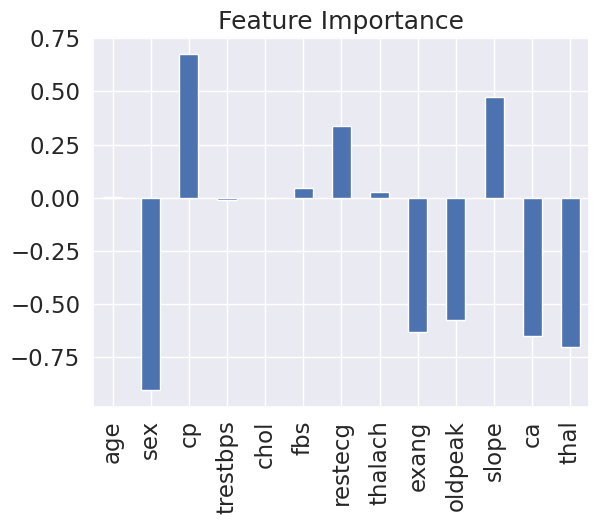

In [74]:
feature_df=pd.DataFrame(feature_dict,index=["Contribution"])
feature_df.T.plot.bar(legend=False,title="Feature Importance") ;
## cp was 0.43 correlated with target
## now cp is 0.67 
## from the graph i could say if someone sex=0 (female) then has a high prob to be affected heart disease patient (target=1)

 from the visulalization if anything doesnt make sense or how a feature work and contributed in target u can 
discuss with the expert ... and u can show him the visualization

u could also remove or combine the features that are not really important and contributed in our target
not only saving the time for computing but also will guarantee the same performance of model

## 6.Experimentation

if u havent hit your evaluation metric yet (95%) ,,, ask yourself
1) could u collect more of data ? 
2) could u try another model like catbost or xgbost .. ? 
3) could we improve our current tunning our hyperparameter using grid or random search cv or by hand

if you hit your target ... 
* How do u export or share it with others

## Quick note about evaluation metrics

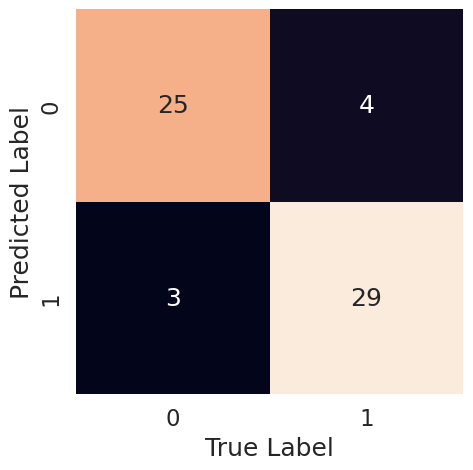

In [75]:
plot_conf_mat(conf_mat)


* 29 is a true positive ... 4 is a false negative 29/29+4 is called sensitivity or precision for positive 1
* 25 is a true negative .... 3 is a false positive 25/25+3 is called specificity 
* Here u make the trade off to compare 2 model using confusion matrix ... u want that your model have a high sensitivity 
* which mean : can identify who have a heart disease (positive) in regardless of the accuracy of identyfing the non heart disease patients... or u want to have a high specificity accuracy of identifying who has not heart disease is better

* ROC CURVE is a relation between true positive 29 and false positive 3 (identify wrongly a heart idsease)
* the line between 45 deg is when fpr=tpr ... fpr=1-specificity =1- 25/25+3 = 0.107
* if there is a point exist on (1,1) on ROC curve thats mean our model correctly identified all heart disease patients and incoreectly identified all not heart disease patients thats really bad!!!
* High sensitivity and low false positive rate is the goall
* thats can be realized when AUC (area under curve) is higher
* Comparing Models and chossing the higher AUC in ROC curve
* choosing a metric is a business matter ..... u want to have high accuracy of predicting true positive (discover the disease) or the true negative (tell that there are no disease) ... i think the option 1 is the best for this case because if u got wrong on identifing that a person have a disease its better than identifing an actual heart disease person as a negative ......which 